In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold, cross_val_score,GridSearchCV, learning_curve, validation_curve)
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")

In [41]:
df


,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [42]:
df.info

<bound method DataFrame.info of        1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00    0.00    1
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00    0.00    1
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00    0.00    1
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00    0.00    1
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00    0.26    1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...     ...  ...
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06    0.00    7
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59    0.00    7
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64    0.00    7
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57    0.00    7
212  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67    0.00    7

[213 rows x 11 columns]>

In [43]:
def nirmalize (df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name]- min_value) / (max_value - min_value)
        return result     

In [44]:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [45]:
df.shape

(213, 11)

In [46]:
df['1'].unique()

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

In [47]:
df.dtypes

1            int64
1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1.1          int64
dtype: object

In [48]:
# Adding meaningful column and attributes names


names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'SI', 'K', 'Ca', 'Ba', 'Fe', 'Glass Type']
df.columns = names
df.head()

,Id,RI,Na,Mg,Al,SI,K,Ca,Ba,Fe,Glass Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [49]:
# Removing unnecessary column


df = df.drop('Id', 1)

In [50]:
df.head(3)

,RI,Na,Mg,Al,SI,K,Ca,Ba,Fe,Glass Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


# Statistics of Dataset

   #Descriptive Statistics


In [51]:
df.describe()

,RI,Na,Mg,Al,SI,K,Ca,Ba,Fe,Glass Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


above statistics show that data is data at all attributes is not in same range. So we have to normalise data first.

# Data Visualization

1. using univariate plots

In [52]:
features =  ['RI', 'Na', 'Mg', 'Al', 'SI', 'K', 'Ca', 'Ba', 'Fe']

label = ['Glass Type']

X =df[features]

y = df[label]

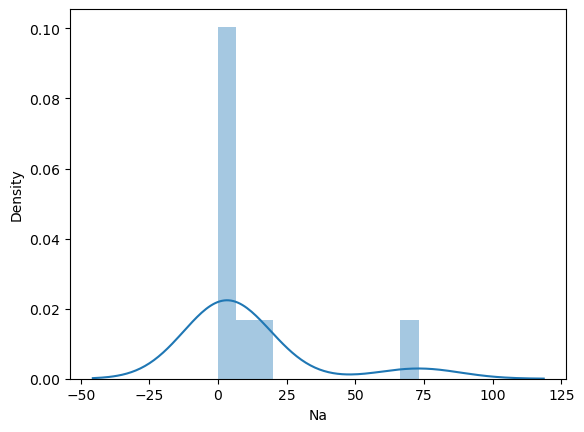

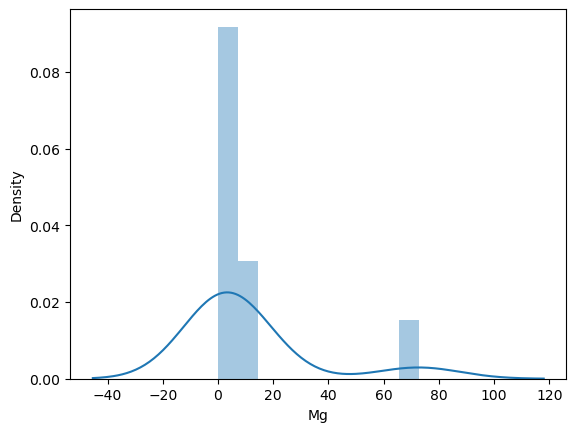

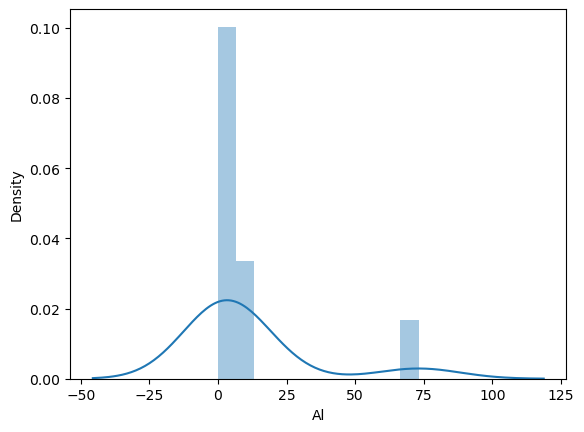

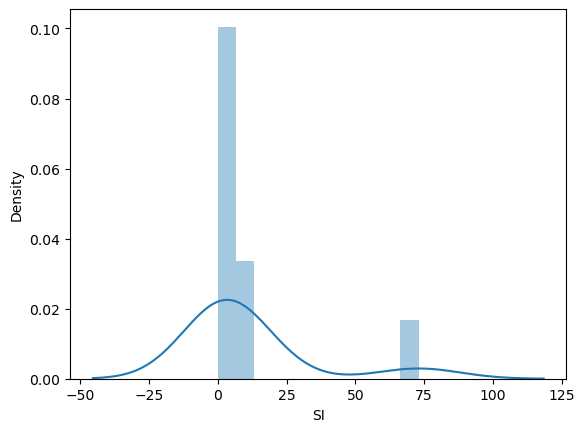

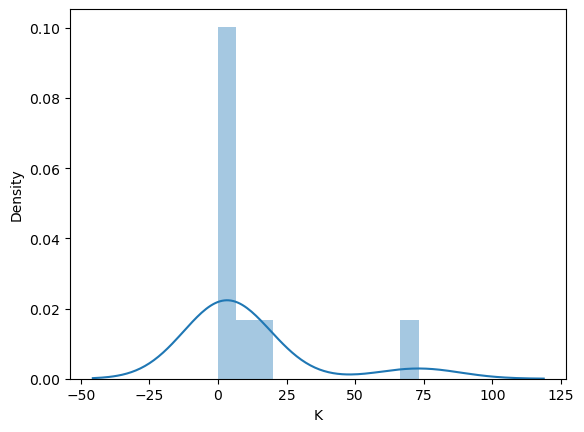

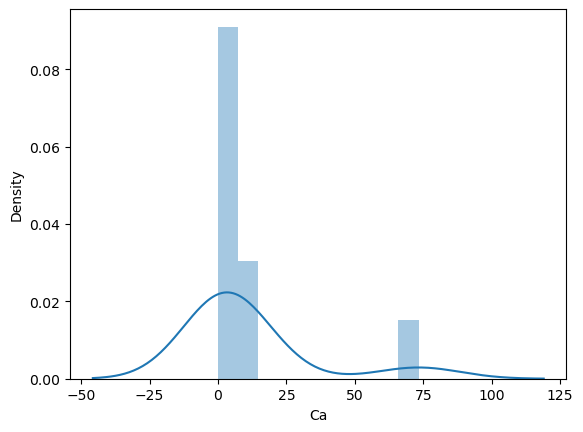

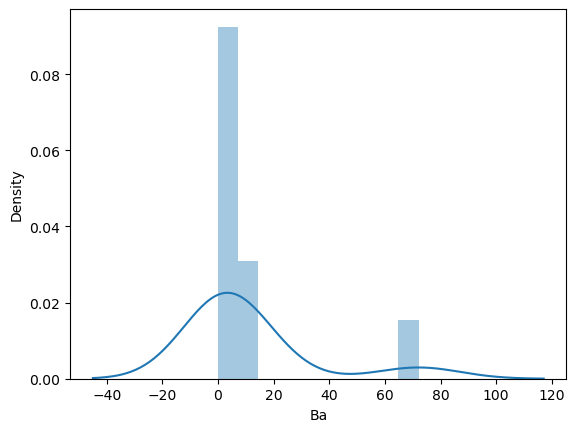

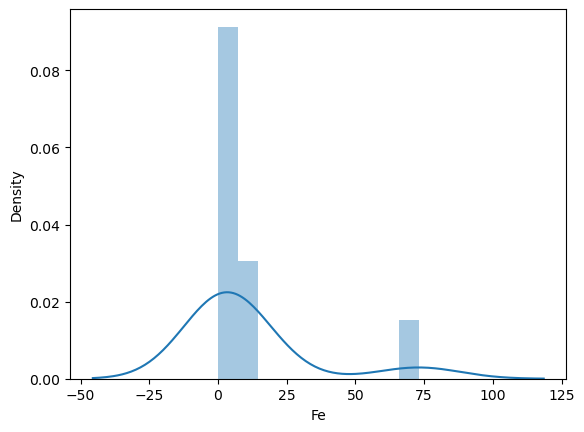

In [53]:
x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1, 9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

Outcome

1.Our dataset is skewed either on positive sight or negative sight and data is not normalised.

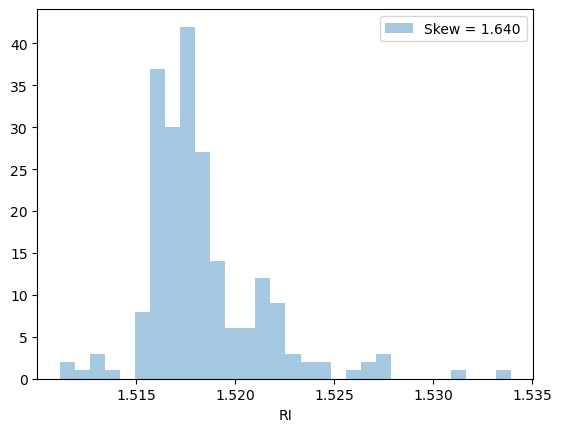

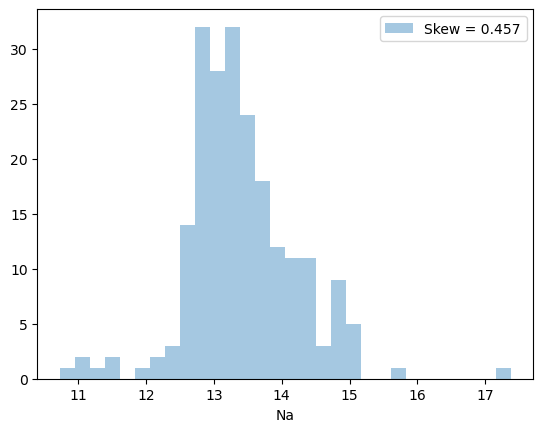

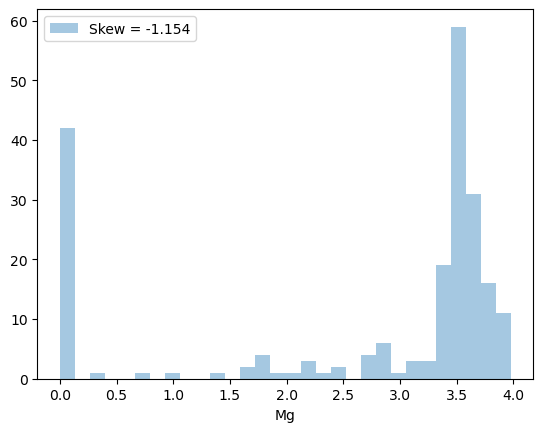

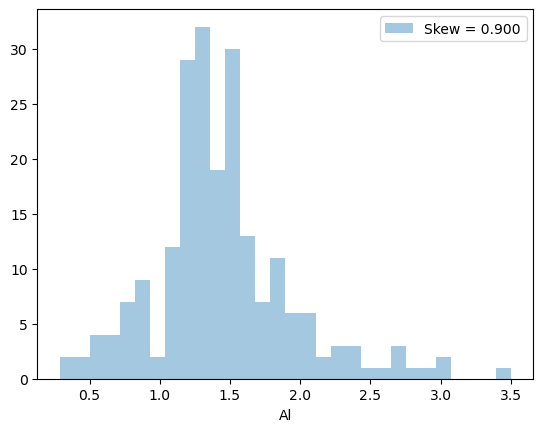

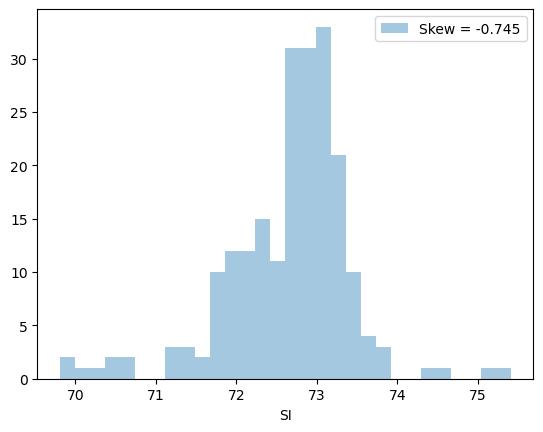

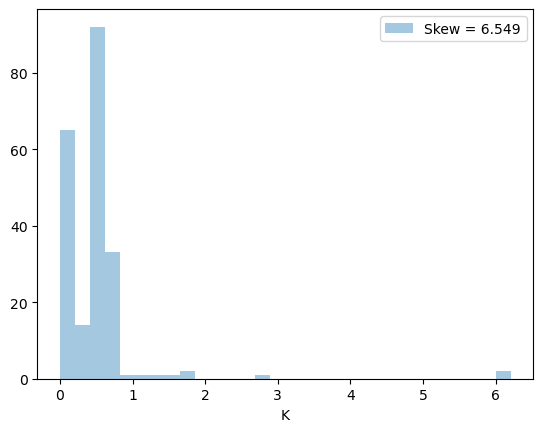

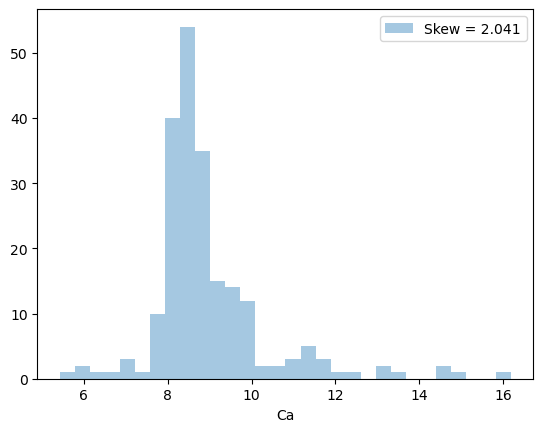

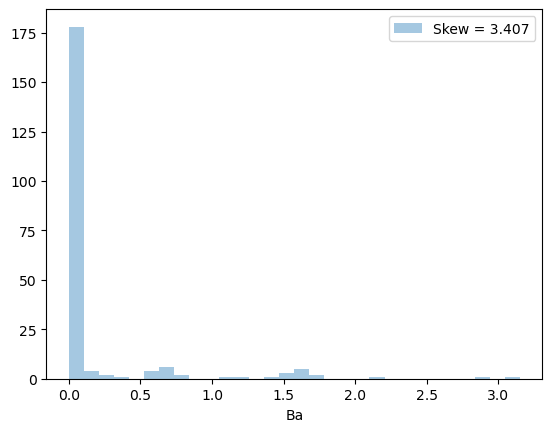

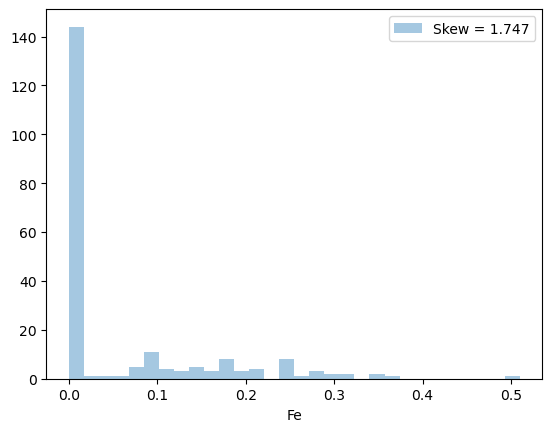

In [54]:
#Trying to gain more insight about data.

for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f'%(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# 2.Using Multivariate Plots

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x800 with 0 Axes>

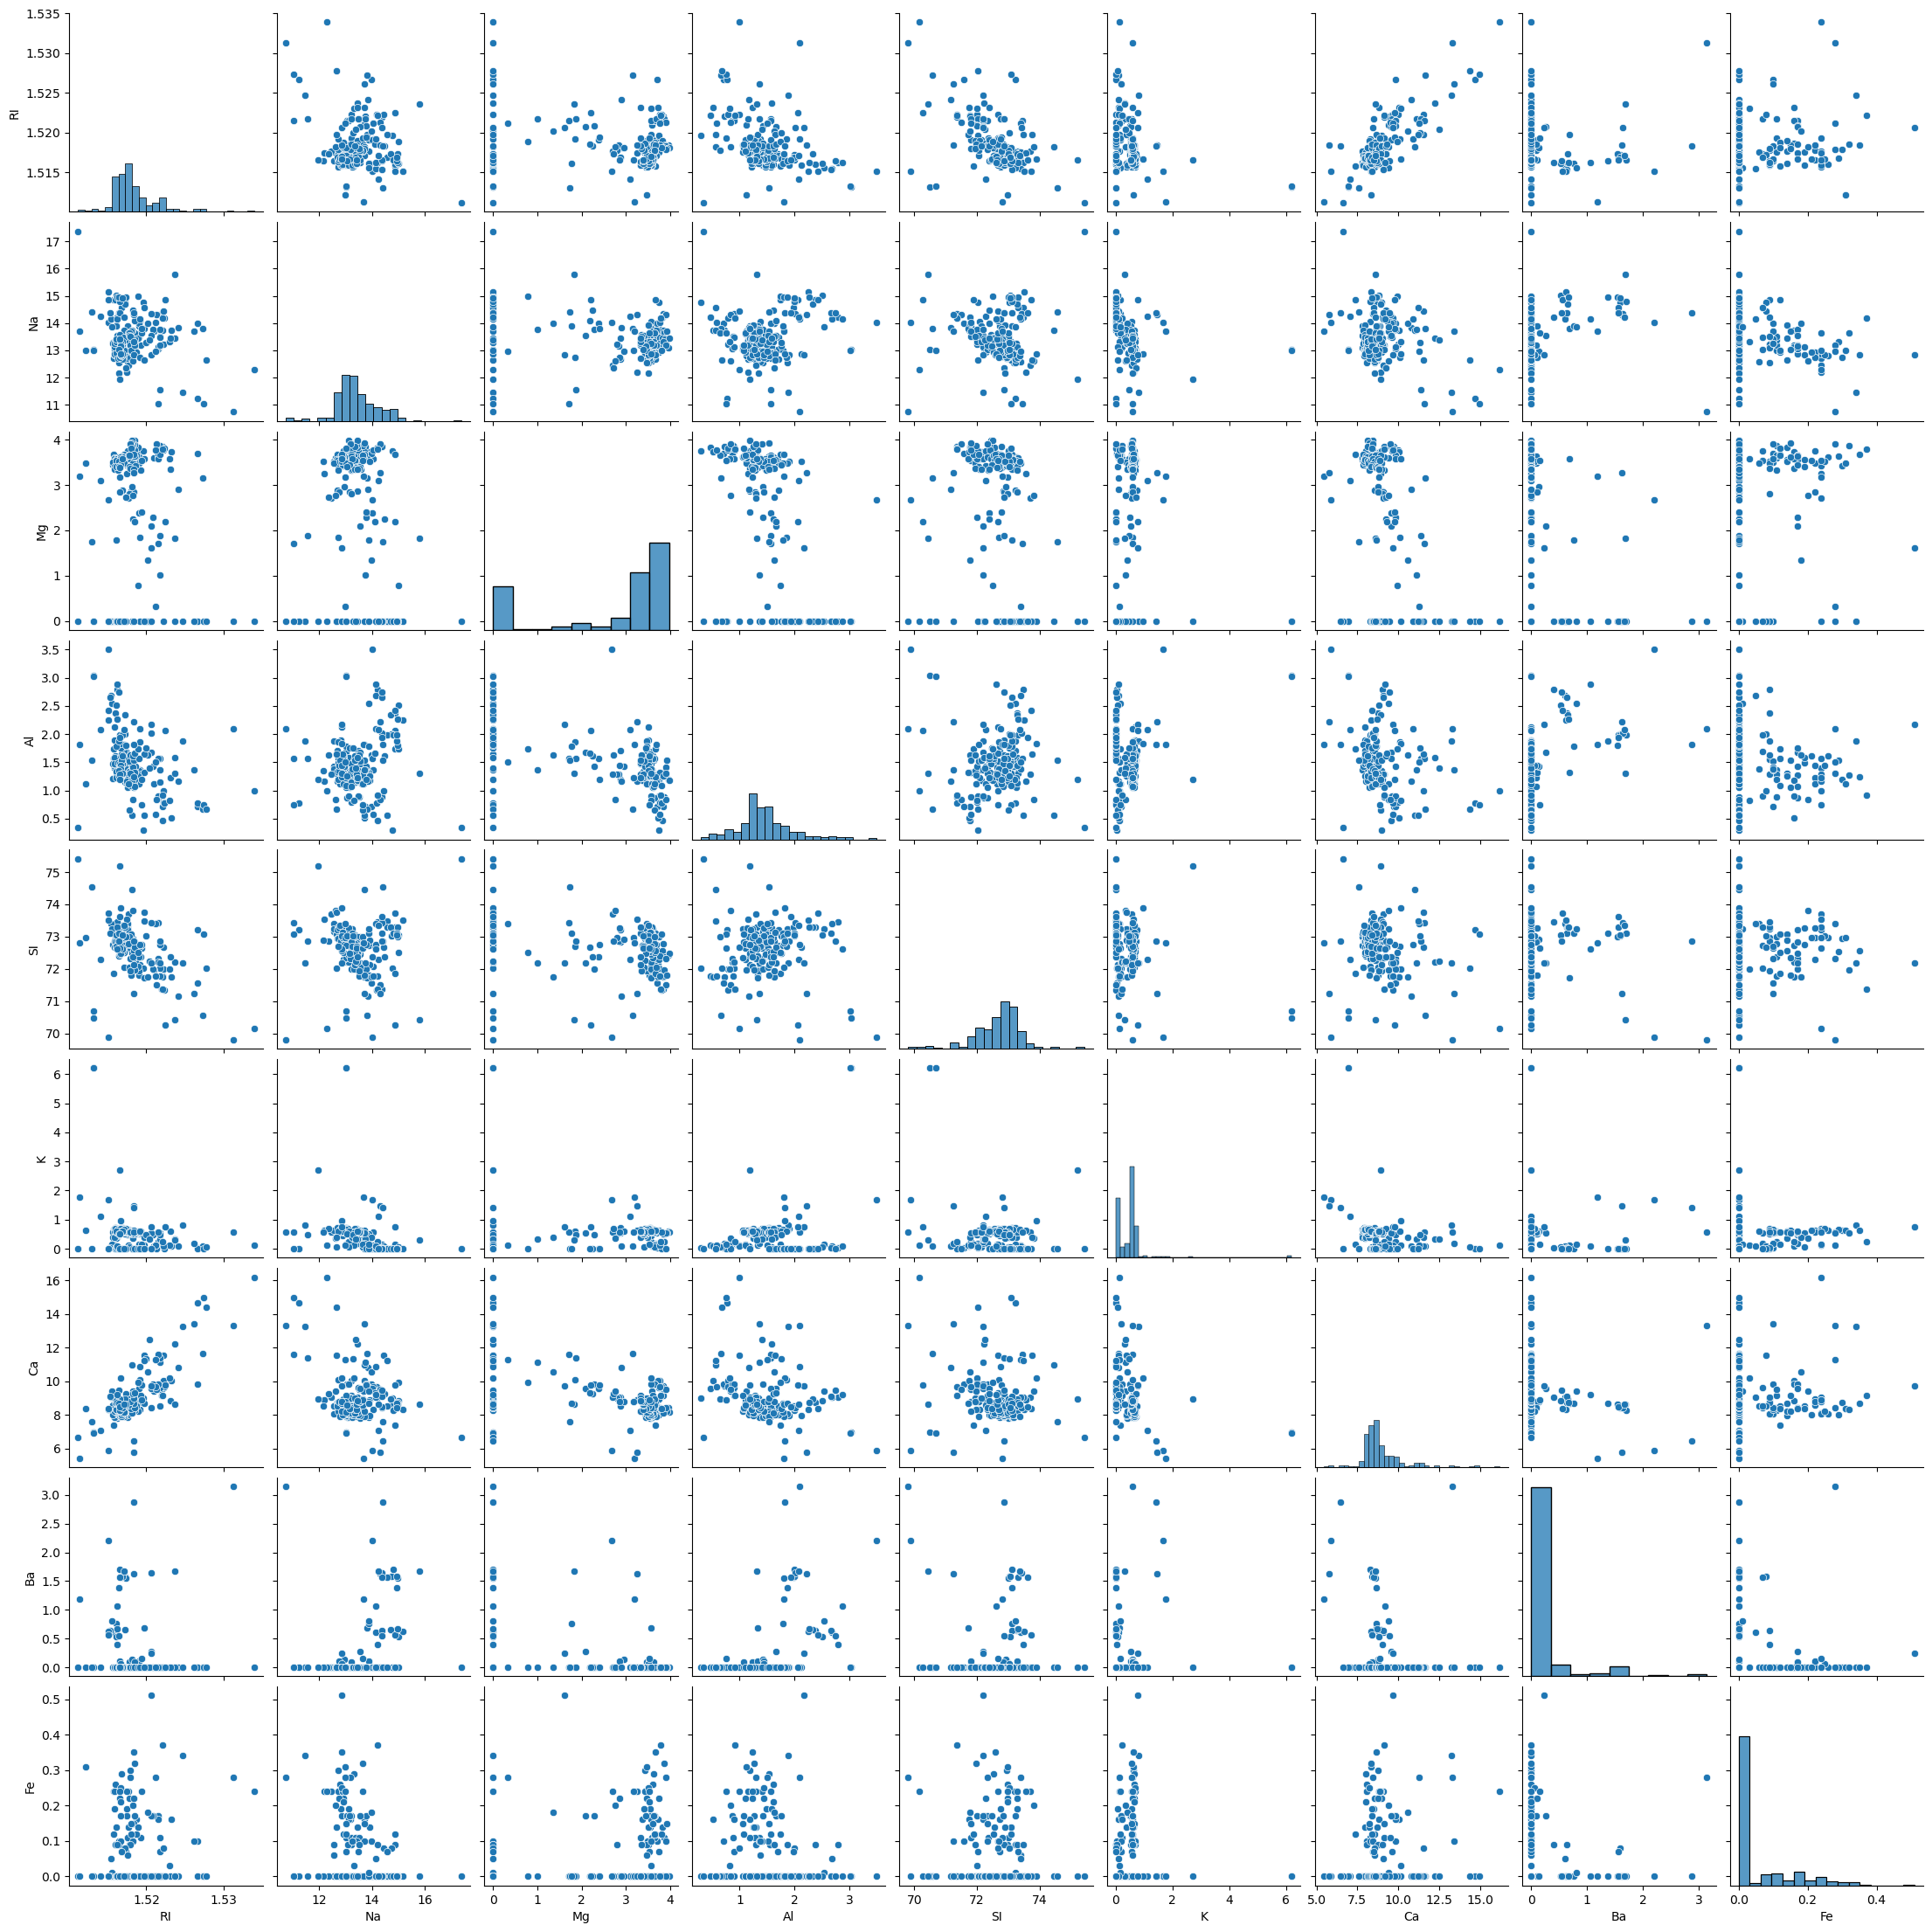

In [55]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8, 8))
sns.pairplot(data=x2)
plt.show

# 3. Using Correlation Matrix

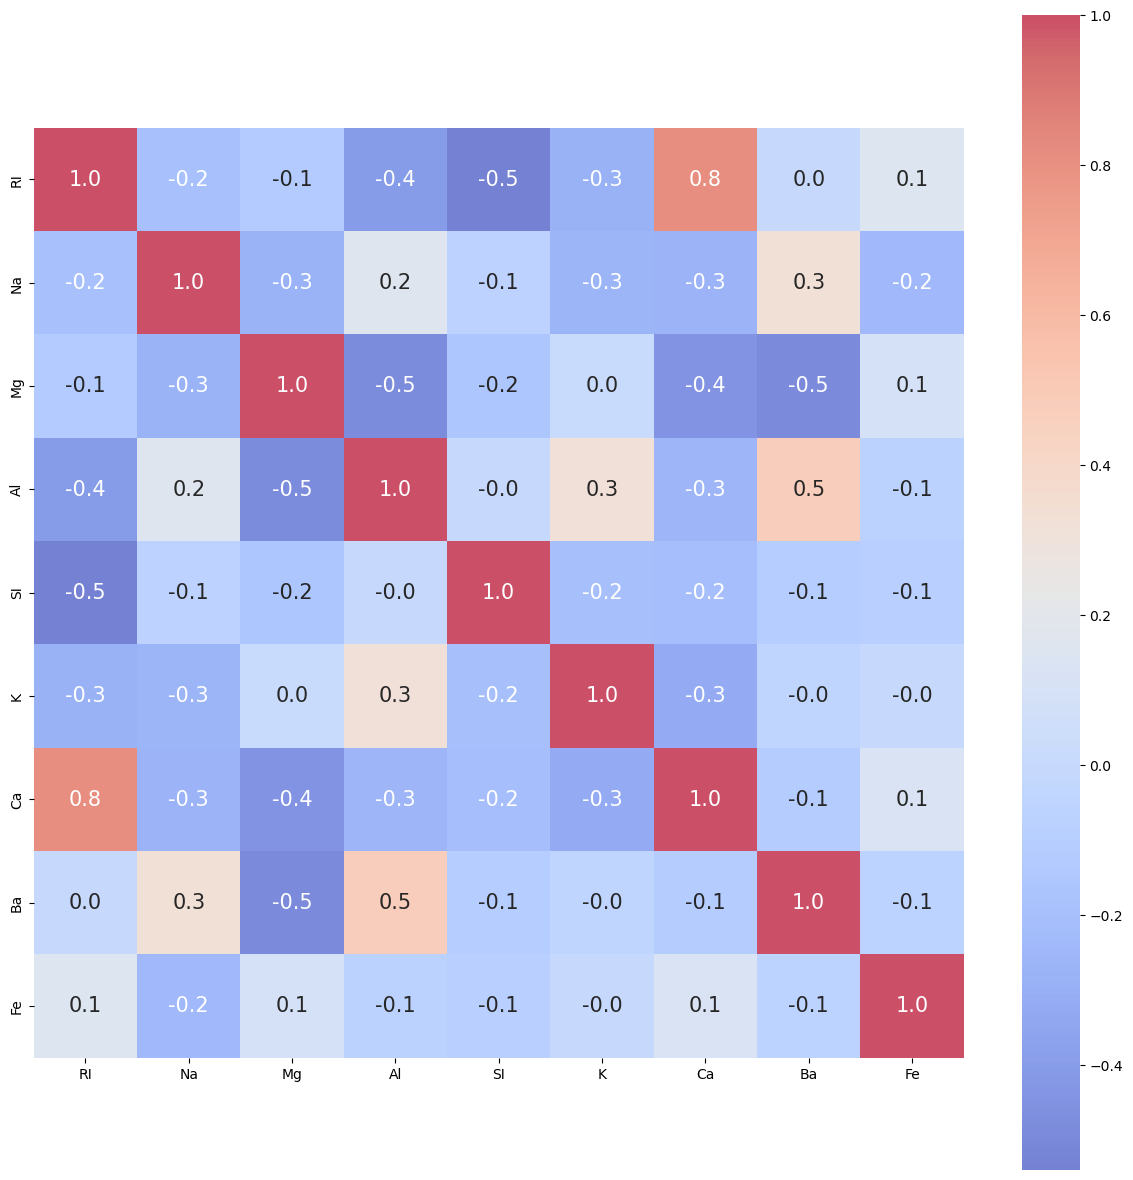

In [56]:
coreleation = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

Outcomes

1. Al and Ba intermidiate correlation with each other.
2. RI and Ca have strong correlation between each other.

# Outlier Detections

In [57]:
def outlier_hunt(df):
    
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than two outliers
    """
    
    outlier_indices = []
    
    for col in df.columns.tolist():
        
        Q1 = np.percentiles(df[col],25)
        
        Q3 = np.percentile(df[col],75)
        
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR
        
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step ) | (df[col] >  Q3 + outlier_step )].index
        

        outlier_indices.extend(outlier_list_col)
        
        
        outlier_indices = Counter(outlier_indices)
        
        multiple_outliers = list( k for k,  v in outlier_indices.items() if v > 2)
        
        
        return multiple_outliers
    
    
    print('The dataset contain %d observations with more than 2 outliers'%(len(outlier_hunt(dF[features]))))

# Data Treatment

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          213 non-null    float64
 1   Na          213 non-null    float64
 2   Mg          213 non-null    float64
 3   Al          213 non-null    float64
 4   SI          213 non-null    float64
 5   K           213 non-null    float64
 6   Ca          213 non-null    float64
 7   Ba          213 non-null    float64
 8   Fe          213 non-null    float64
 9   Glass Type  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


1. The data set is clean there are no missing value in it.

# Removing Outliers

In [59]:
# normalising the data in range [0, 1]


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [60]:
X.head(2)

,RI,Na,Mg,Al,SI,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0


In [61]:
y.head(2)

,Glass Type
0,1
1,1


# 3.Scalling the Feature

In [62]:
from sklearn import preprocessing
X = preprocessing.scale(X)

# Visualization of the data after being processed

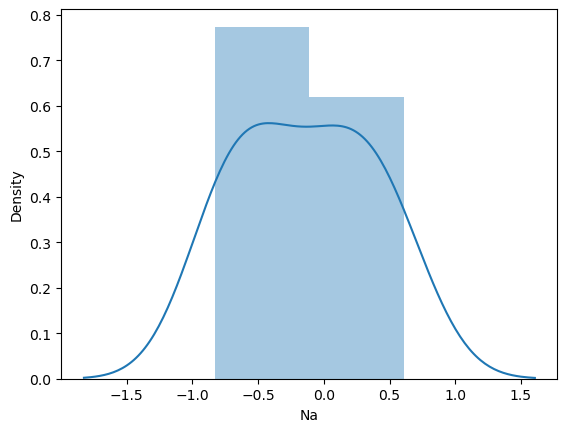

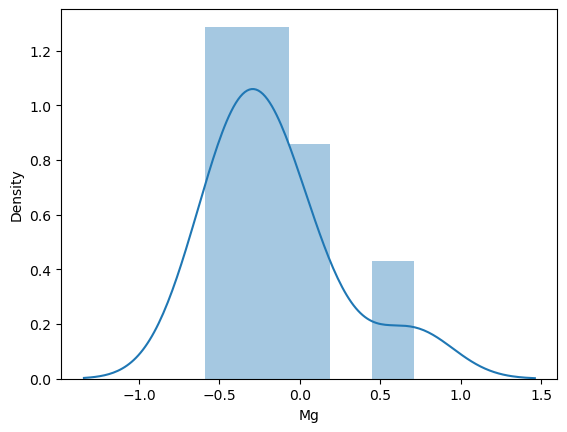

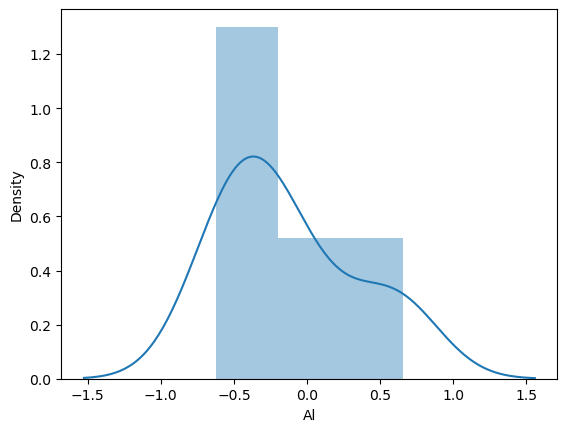

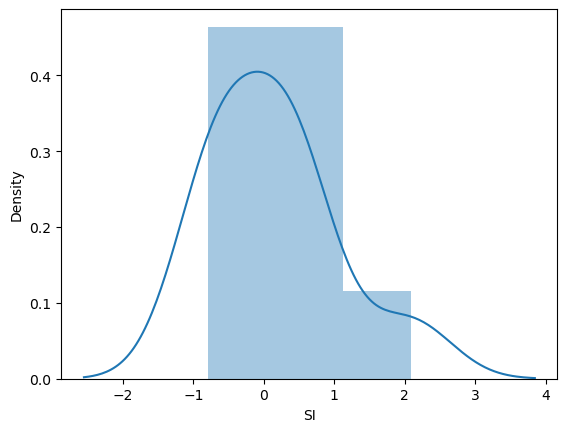

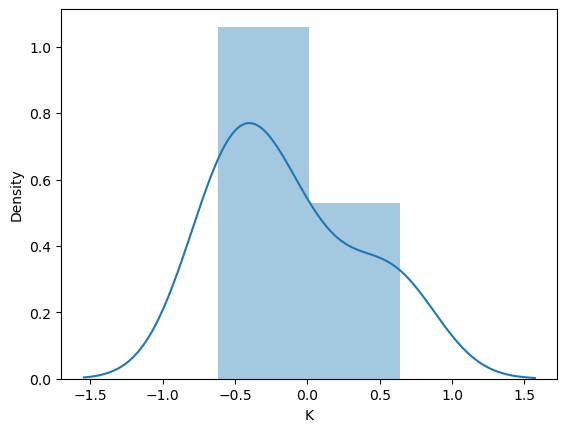

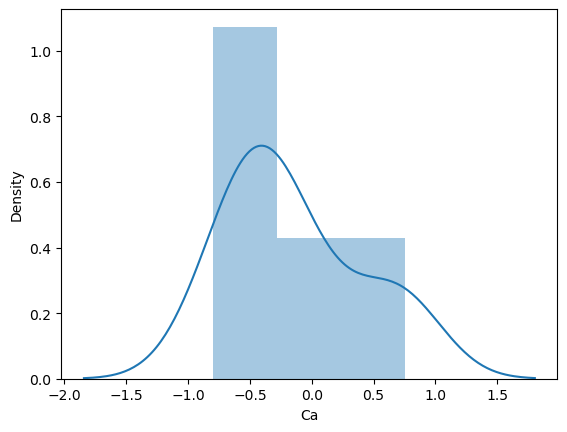

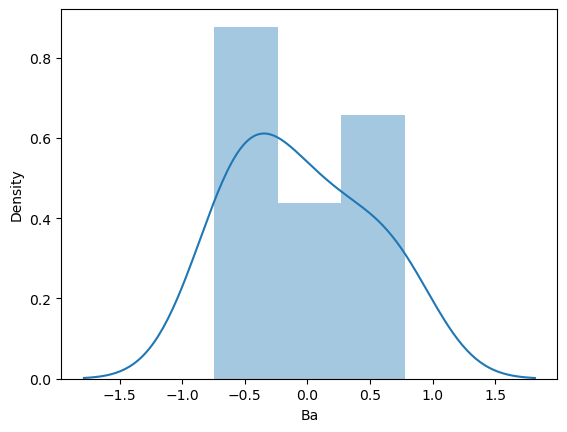

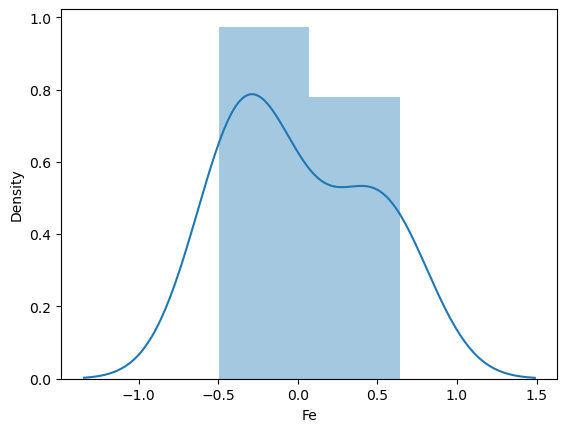

In [63]:
x2 = X


for i in range (1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

Outcomes:
    
    According to the diagram.After processsing
    
    1.Skewness is redused
    2.Data is more normalized

# Training set - test set split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0, stratify=y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = '+ str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = '+ str(y_test.shape))

Shape of X_train = (159, 9)
Shape of X_test = (54, 9)
Shape of y_train = (159,)
Shape of y_test = (54,)


# Training different machine learning model

# 1. K-Nearest Neighbors

In [65]:
Scores = []


for i in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score = knn.score(X_test, y_test)
    Scores.append(score)
    
    print(knn.score(X_train,y_train))
    print(Scores)


0.8176100628930818
[0.7222222222222222]
0.8113207547169812
[0.7222222222222222, 0.6851851851851852]
0.8113207547169812
[0.7222222222222222, 0.6851851851851852, 0.6481481481481481]
0.7358490566037735
[0.7222222222222222, 0.6851851851851852, 0.6481481481481481, 0.6851851851851852]
0.6981132075471698
[0.7222222222222222, 0.6851851851851852, 0.6481481481481481, 0.6851851851851852, 0.6111111111111112]
0.7421383647798742
[0.7222222222222222, 0.6851851851851852, 0.6481481481481481, 0.6851851851851852, 0.6111111111111112, 0.7037037037037037]
0.6918238993710691
[0.7222222222222222, 0.6851851851851852, 0.6481481481481481, 0.6851851851851852, 0.6111111111111112, 0.7037037037037037, 0.6851851851851852]
0.6792452830188679
[0.7222222222222222, 0.6851851851851852, 0.6481481481481481, 0.6851851851851852, 0.6111111111111112, 0.7037037037037037, 0.6851851851851852, 0.6481481481481481]
0.7044025157232704
[0.7222222222222222, 0.6851851851851852, 0.6481481481481481, 0.6851851851851852, 0.6111111111111112, 

# 2. Decision Tree

In [66]:
Scores = []


for i in range(1):
    
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train,y_train)
    score = tree.score(X_test, y_test)
    Scores.append(score)
    
    print(tree.score(X_train,y_train))
    print(Scores)

1.0
[0.7407407407407407]


# 3. Logistic Regression

In [67]:
Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter = 100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test, y_test)
    Scores.append(score)
    
    print(logistic.score(X_train, y_train))
    print(Scores)

0.6918238993710691
[0.6851851851851852]


# 4. SVM Classifier (Non linear)

In [68]:
Scores = []

for i in range(1):
    svc = SVC(gamma = 'auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test, y_test)
    Scores.append(score)
    
    print(svc.score(X_train, y_train))
    print(Scores)

0.7672955974842768
[0.7222222222222222]


# Summary

SVM giving best result with:

    training accuracy: 0.76729
    
    testing accuracy: 0.722222